<a href="https://colab.research.google.com/github/viviend1604/viviend1604/blob/main/Property_sales_in_Melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MELBOURNE PROPERTY SALES ANALYSIS PROJECT**

**INTRODUCTION**

In order to identify the main factors affecting real estate prices, this research examines the Melbourne real estate market. It analyzes trends by location, size, and attributes like rooms, land size, and building area using a dataset of real estate sales.

To investigate price differences between suburbs and regions as well as attribute-price correlations, the analysis uses statistical summaries, data cleansing, and visualizations. Python tools like pandas, matplotlib, and seaborn are used to provide insights that give investors, buyers, and sellers a clear picture of the market dynamics and help them make well-informed decisions.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np                  # for linear algebra
import pandas as pd                 # for working with dataset

import matplotlib.pyplot as plt     # visualisation
import seaborn as sns               # visualisation




### **A. DATA EXPLORATION**

Read dataset and inspect its appearance

In [4]:
df= pd.read_csv('/content/drive/MyDrive/Melbourne realestate housing/Property Sales of Melbourne City.csv')

In [5]:
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


The column **Unnamed : 0** will be removed as it is redudant and does not provide any information; furthermore, removing it esnures the analysis focuses only on the relevant data.

In [6]:
print(df.drop('Unnamed: 0', axis =1, inplace = True))
print(df.head())

None
       Suburb           Address  Rooms Type    Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN 

In [7]:
print(df.columns)
print(len(df.columns))


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
21


This is how the dataset looks like after removing **Unamed : 0** column. In this dataset, we have **21 columns** and **5 rows**

Let's explore dataset information

In [8]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18396 non-null  object 
 1   Address        18396 non-null  object 
 2   Rooms          18396 non-null  int64  
 3   Type           18396 non-null  object 
 4   Price          18396 non-null  int64  
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  CouncilArea    12233 non-null  object 
 17  Lattitude      15064 non-null  float64
 18  Longti

Next, check out if there are any duplicated information in the dataset.

In [9]:
df.duplicated().sum()

0

It can be seen that **0 duplicated data** in the dataset so we could head to next step.

Let's check how many null values in our dataset.

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64
Axes(0.125,0.11;0.775x0.77)


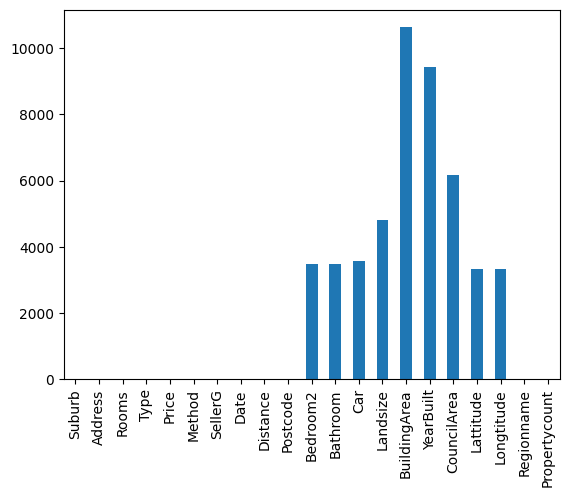

In [10]:
missing_data= df.isnull().sum()
print(missing_data) # ask stakeholder what to do with null values
print(missing_data.plot.bar())

According to the chart, it can be seen that **Landsize, Building Area, Year Built** and **Council Area** are four categories with highest number of missing values.  

*Suggestions: use mean value to replace null value. if # of null value less than 1% such as Distance, Postcode, Regionname, it's better to exclude these data. Other option would be to do analysis on 'good' data that doesnt have null values.*

## **B. DATA CLEANSING**
The following columns from the dataset will be utilized for analysis and insights:

**Suburb**: To analyze price variations across different suburbs.

**Rooms**: Number of rooms in the property, used to assess its impact on price.

**Type**: Property type (e.g., house, unit, or townhouse), which affects pricing.

**Price:** The target variable for analysis to study trends and relationships.

**Method:** Sale method (e.g., auction, private sale) to identify any potential impact on prices.

**SellerG:** The real estate agency involved in the sale, to explore agency-wise trends if needed.

**Date:**  Sale date, which can be used for temporal analysis (e.g., price trends over time).

**Distance:** Distance to the Central Business District (CBD), a key factor influencing property value.

**Bathroom:** Number of bathrooms, used to study its effect on property price.

**Car:** Number of car spaces, a feature that contributes to the overall property value.

**Landsize:** The size of the land in square meters, which significantly impacts pricing.

**BuildingArea:** The size of the built-up area, critical for determining the property's value.

**YearBuilt:** Construction year of the property, potentially affecting price due to age.

**Regionname:** Regional classification to analyze price trends across regions.

**CouncilArea:** Governing council for properties, which could influence regulations and property values.

Therefore, the **'Address'** column is excluded from the analysis as it does not contribute insight into property pricing or trends.

In [11]:
print(df.drop('Address', axis =1, inplace = True))
print(df.columns)

None
Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')


In [12]:
print(df.head)

<bound method NDFrame.head of              Suburb  Rooms Type    Price Method     SellerG        Date  \
0        Abbotsford      2    h  1480000      S      Biggin   3/12/2016   
1        Abbotsford      2    h  1035000      S      Biggin   4/02/2016   
2        Abbotsford      3    h  1465000     SP      Biggin   4/03/2017   
3        Abbotsford      3    h   850000     PI      Biggin   4/03/2017   
4        Abbotsford      4    h  1600000     VB      Nelson   4/06/2016   
...             ...    ...  ...      ...    ...         ...         ...   
18391  Williamstown      2    t   622500     SP        Greg  26/08/2017   
18392  Williamstown      4    h  2500000     PI     Sweeney  26/08/2017   
18393     Yallambie      4    h  1100000      S  Buckingham  26/08/2017   
18394    Yarraville      4    h  1285000     SP     Village  26/08/2017   
18395    Yarraville      4    h  1050000     VB     Village  26/08/2017   

       Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  Buildin

After gathering necessary information for the analysis, we are going to fill the missing values by its median values. Here are two columns to fill missing values:
*   **Landsize:** it is a critical factor in determining property value, especially for housing; therefore, missing values possibly weaken the insights of its relationship with price
*  **Building area:** it is directly tied to property pricing; hence, it could negatively affect the relationshio between property size and value.






In [13]:
df['Landsize']=df['Landsize'].fillna(df['Landsize'].median())
df['BuildingArea']=df['BuildingArea'].fillna(df['BuildingArea'].median())
print(df.isnull().sum())

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         3469
Bathroom         3471
Car              3576
Landsize            0
BuildingArea        0
YearBuilt        9438
CouncilArea      6163
Lattitude        3332
Longtitude       3332
Regionname          1
Propertycount       1
dtype: int64


## **C. DATA INSIGHTS AND ANALYSIS**
### 1. Property prices by suburb
In this section, we are going to analyse property pricing in top 10 suburbs in Melbourne based on property listings. The visualisation below shows insights into how location impacts property values, revealing high-demand suburbs with premium price tags and areas with diverese pricing options.

In [14]:
# Identify the top 10 suburbs by property count
top10_suburbs = df['Suburb'].value_counts().head(10).index
print(top10_suburbs)

Index(['Reservoir', 'Bentleigh East', 'Richmond', 'Preston', 'Brunswick',
       'Essendon', 'South Yarra', 'Glenroy', 'Glen Iris', 'Brighton'],
      dtype='object', name='Suburb')


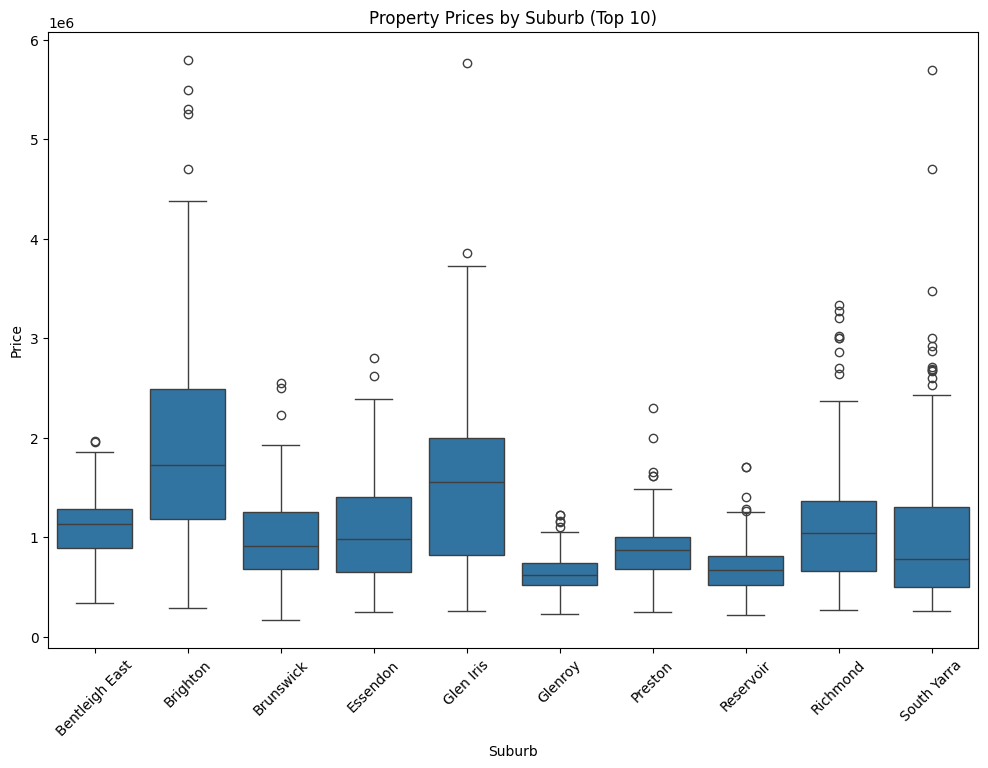

In [15]:
# Identify the top 10 suburbs by property count
top_suburbs = df['Suburb'].value_counts().head(10).index

# Filter the dataset to include only properties from these top suburbs
price_by_suburb = df[df['Suburb'].isin(top_suburbs)]

# Create a boxplot to visualize property prices by suburb
plt.figure(figsize=(12, 8))
sns.boxplot(data=price_by_suburb, x='Suburb', y='Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Property Prices by Suburb (Top 10)")
plt.xlabel("Suburb")
plt.ylabel("Price")
plt.show()


Regarding to the chart, it could be seen that suburbs closer to the CBD or with premium amenities command higher property prices and have a narrower price range. Moreover, suburbs with diverse price ranges often reflect a mix of property types, catering to both budget and luxury segments. Outliers are important indcators of unique market opportunities or exceptions within typical suburb pricing trends. With this analysis, buyers and sellers possibly have valuable insights to understand pricing trends in specific suburbs.

### 2. Property prices by region
Property prices across different regions in Melbourne will be analysed by comparing price distributions, we are going to explore how regional factors, such as proximity to the CBD and local amenities, influence property values. The visualisation will highlight price trends, variability, and key differences among regions, offering insights into the dynamics of Melbourne' property market.

<ipython-input-16-1ffa5ab227c8>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x='Regionname', y='Price', scale='width', inner='quartile')


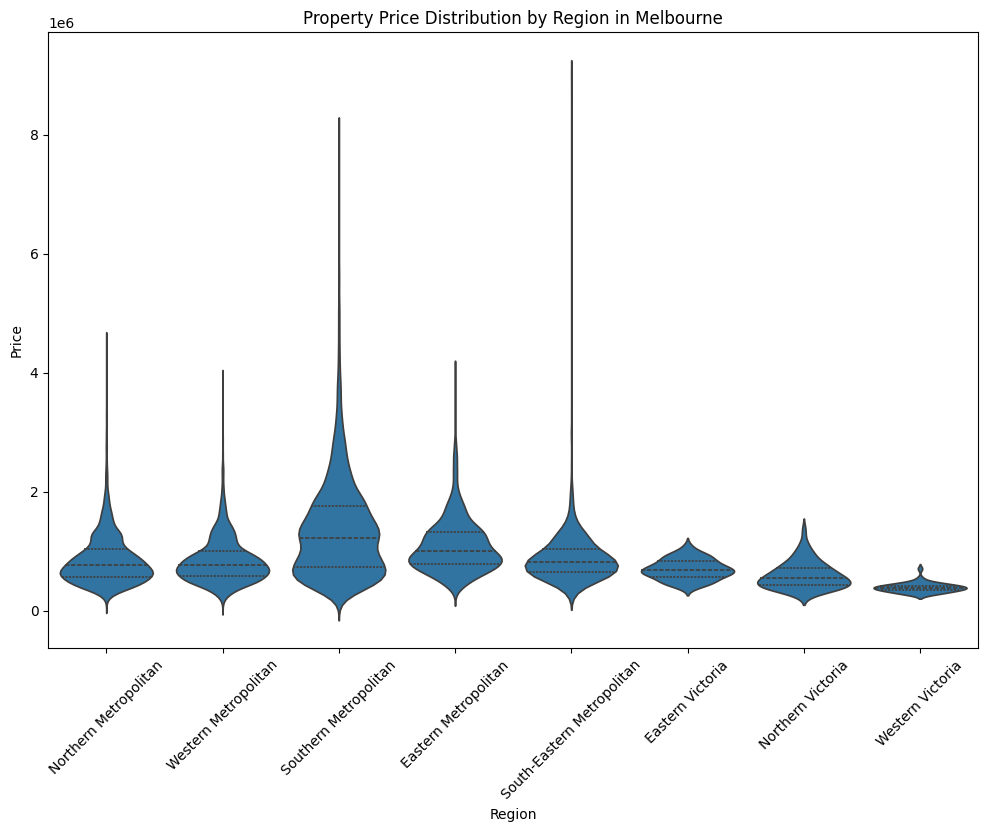

In [16]:
# Create a violin plot to visualize property prices by region
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Regionname', y='Price', scale='width', inner='quartile')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Property Price Distribution by Region in Melbourne")
plt.xlabel("Region")
plt.ylabel("Price")
plt.show()


With the violin plot, it provides a detailed view of the distribution of property prices across Melbourne's regions. It helps we are able to valuate the location matters, market diversity and density insights. Firstly, the location matters, the property pricing is significantly influenced by the proximity to the CBD that inner regions will command higher prices. Secondly, with marker diversity, most of moderate and outer regions offer a mix of affordable and premium options, catering to varied buyers and demographics. Lastly, density insights, high-density clusters highlight common price ranges, while tails indicate market extremes.

### 3. Relationship between attributes and price
In this section, we will go deeper into the relationship between property attributes such as the number of rooms, bathrooms, car spaces, landsize, building area and property prices. To identify how different features influence property values, and uncover trend that highlight their performance in Melbourne's realestae martket, let's visualise these relationships for clear vision and analysis.

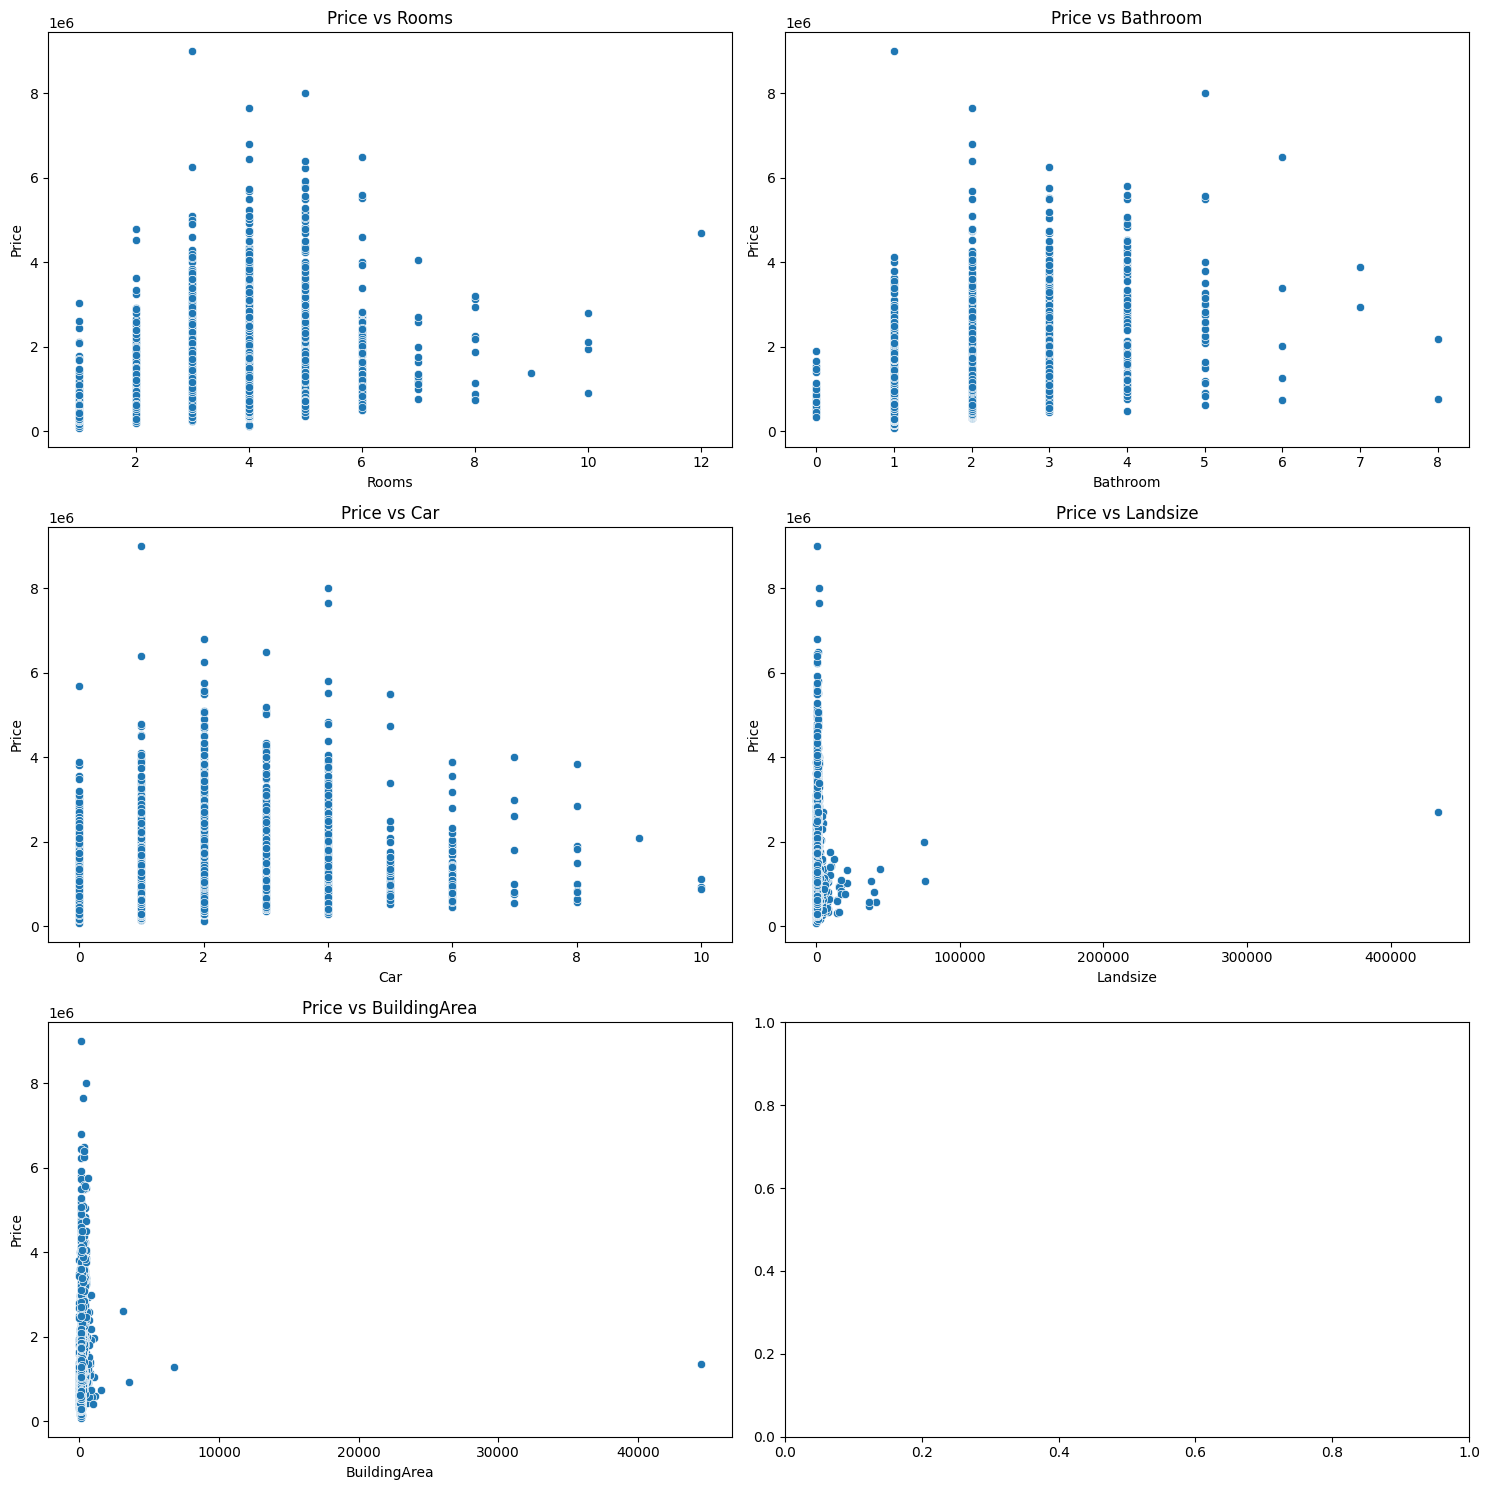

In [17]:
# Attributes to analyze
attributes = ['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']

# Create scatter plots to visualize relationships between attributes and price
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for idx, attr in enumerate(attributes):
    sns.scatterplot(data=df, x=attr, y='Price', ax=axes[idx])
    axes[idx].set_title(f"Price vs {attr}")
    axes[idx].set_xlabel(attr)
    axes[idx].set_ylabel("Price")

# Adjust layout for clarity
plt.tight_layout()
plt.show()


Regarding to the visualised tight relationships, there are three key takeaways that should be considered: location's impact, diminishing returns and outliers. With the location's impact, while attribute like size and features influence prices, location plays an important role For instance, small properties in prime areas maybe more expensixe than larger ones in outer suburbs. On the other hand, diminishing returns attributes such as rooms, bathrooms and building area show diminishing returns after a certain threshold. Last but not least, high-price properties with fewer features likely reflect location or unique market factors.

### **D. CONCLUSION**
This project provided an in-depth analysis of Melbourne'property market, focusing on suburb trends, regional differences, and the impact of property atttribute on pricing.These are primary key findings:

1.   Property prices by suburb:
*   Surbubs like South Yarra and Hawthorn are premium areas with high median prices, reflecting their desirability.
*   Richmond and St Kilda show diverse price ranges, indicating a mix of affordable and luxury house selections



2.   Regional price trends:
*   Inner Metropolitian and Nothern Metropolitian regions dominate with the highest property values due to their proximity to the CBD and premium amenities.
*   Outer regions, such as Western Metropolitian, offer more affordable housing options, catering to a wider audience.

3.   Impact of property attributes:


*   Features like land size, building area and the number of rooms positively influence property prices, though location often outweighs these factors.
*   Diminishing returns are observed for larger properties, with luxury segments commanding higher ranges








# **Overall insights**

Melbourne' property sales market is contributed by a combination of location and property specific attributions. While inner-city areas and premium suburbs attract higher prices, outer regions provide opportunities for budget conscious buyers. These insights can guide stakeholders in making decisions, whether for investment, buying, or selling in this dynamic realestate sector.

